**Objectives and Scope of the Task**

The primary objective of this project is to develop a machine learning model that predicts employee attrition using various employee characteristics and work-related features. The task involves using supervised learning techniques, with a focus on classification, to predict whether an employee will leave the company (Attrition: Yes/No) based on a set of factors like job satisfaction, age, education, work-life balance, and other relevant attributes.

The dataset used for this task is the HR Analytics dataset, which contains 38 features and 1,480 rows of employee data. The dataset includes attributes such as Age, DistanceFromHome, MonthlyIncome, JobSatisfaction, and YearsAtCompany, which are highly correlated with employee retention and performance. The goal is to create a machine learning model that can accurately predict attrition, providing valuable insights for human resources management.

**Numerical Features:**


1. Age
2. DailyRate
3. DistanceFromHome
4. Education
5. EmployeeNumber
6. EnvironmentSatisfaction
7. HourlyRate
8. JobInvolvement
9. JobLevel
10. JobSatisfaction
11. MonthlyIncome
12. MonthlyRate
13. NumCompaniesWorked
14. PercentSalaryHike
15. PerformanceRating
16. RelationshipSatisfaction
17. StandardHours
18. StockOptionLevel
19. TotalWorkingYears
20. TrainingTimesLastYear
21. YearsAtCompany
22. YearsInCurrentRole
23. YearsSinceLastPromotion
24. YearsWithCurrManager

**Categorical Features:**
1. BusinessTravel
2. Department
3. EducationField
4. Gender
5. JobRole
6. MaritalStatus
7. Over18
8. OverTime
9. SalarySlab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Group Project /HR_Analytics.csv')

**Step 1: DATA EXPLORATION**

In [4]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [5]:
df.tail()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0
1479,RM1210,60,55+,No,Travel_Rarely,370,Research & Development,1,4,Medical,...,3,80,1,19,2,4,1,0,0,0.0


In [6]:
df = df.drop(['EmpID'], axis=1)

In [7]:
df.shape

(1480, 37)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1480 non-null   int64  
 1   AgeGroup                  1480 non-null   object 
 2   Attrition                 1480 non-null   object 
 3   BusinessTravel            1480 non-null   object 
 4   DailyRate                 1480 non-null   int64  
 5   Department                1480 non-null   object 
 6   DistanceFromHome          1480 non-null   int64  
 7   Education                 1480 non-null   int64  
 8   EducationField            1480 non-null   object 
 9   EmployeeCount             1480 non-null   int64  
 10  EmployeeNumber            1480 non-null   int64  
 11  EnvironmentSatisfaction   1480 non-null   int64  
 12  Gender                    1480 non-null   object 
 13  HourlyRate                1480 non-null   int64  
 14  JobInvol

In [9]:
df.nunique()

,0
Age,43
AgeGroup,5
Attrition,2
BusinessTravel,4
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1


In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
df.isnull().sum()

,0
Age,0
AgeGroup,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


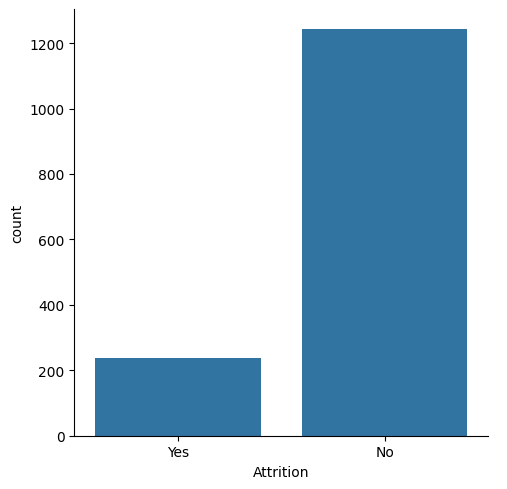

In [12]:
sns.catplot(x="Attrition",data=df,kind="count")
plt.show()

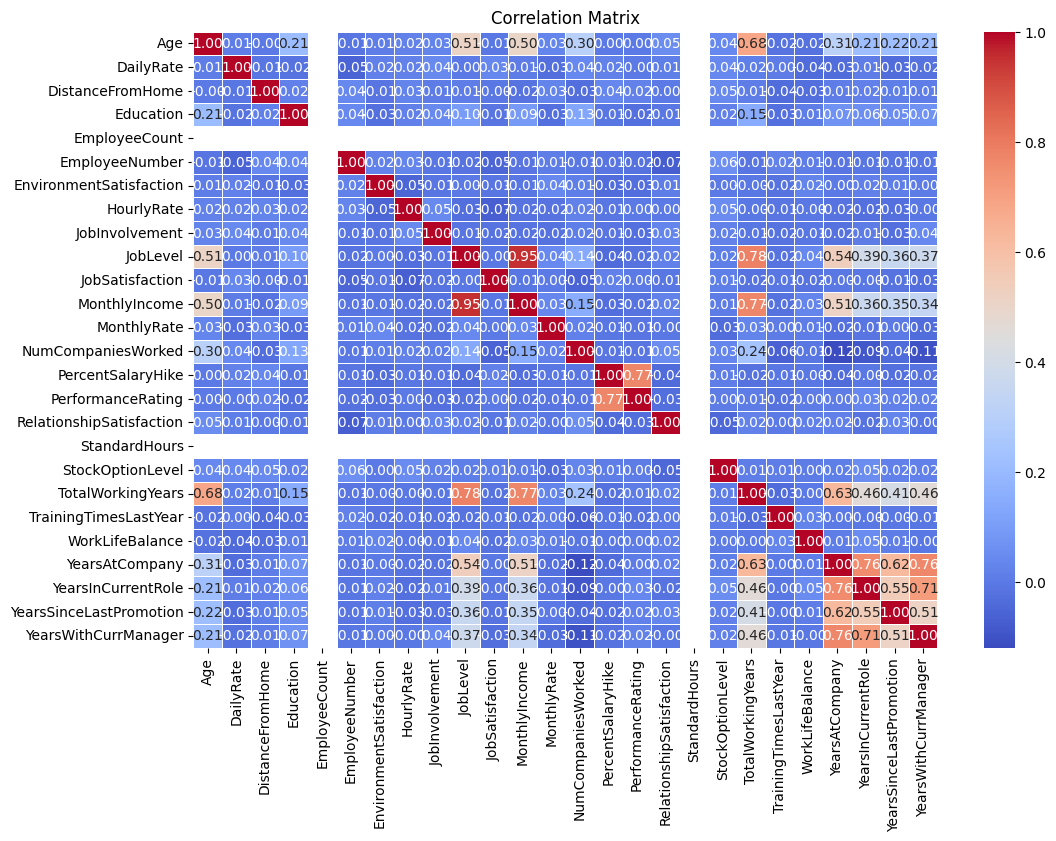

In [13]:
# Correlation matrix of numerical features
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


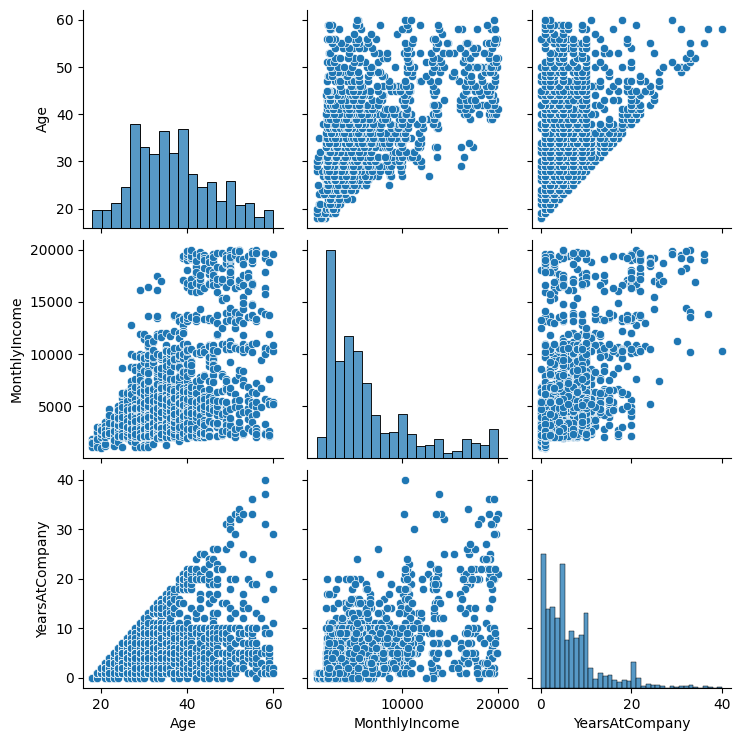

In [14]:
# Scatterplot matrix of numerical features (pairplot)
sns.pairplot(df[['Age', 'MonthlyIncome', 'YearsAtCompany']])
plt.show()


**Step 2: DATA PREPROCESSING**

In [15]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
                     'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
                     'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                     'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                     'PercentSalaryHike', 'PerformanceRating',
                     'RelationshipSatisfaction', 'StandardHours',
                     'StockOptionLevel', 'TotalWorkingYears',
                     'TrainingTimesLastYear','YearsAtCompany',
                     'YearsInCurrentRole','YearsSinceLastPromotion',
                     'YearsWithCurrManager'
                     ]

categorical_features = ['BusinessTravel', 'Department', 'EducationField',
                        'Gender', 'JobRole', 'MaritalStatus',
                        'Over18', 'OverTime','SalarySlab']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**Step 3: Model Training and Evaluation**

In [16]:
# Define the models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Fit the model to the training data
    model.fit(X_train_processed, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_processed)

    # Compute and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Print the classification report
    print(f"Classification Report:\n", classification_report(y_test, y_pred))

    # Print the confusion matrix
    print(f"Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Calculate and print AUC-ROC score if the model supports probability prediction
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_processed)[:, 1]  # Probabilities for the positive class
        auc = roc_auc_score(y_test, y_prob)
        print(f"AUC-ROC: {auc:.2f}")

    print("-" * 50)


Training Logistic Regression...
Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.96      0.93       373
         Yes       0.69      0.44      0.53        71

    accuracy                           0.88       444
   macro avg       0.79      0.70      0.73       444
weighted avg       0.87      0.88      0.87       444

Confusion Matrix:
 [[359  14]
 [ 40  31]]
AUC-ROC: 0.88
--------------------------------------------------
Training Decision Tree...
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.85      0.88       373
         Yes       0.40      0.51      0.44        71

    accuracy                           0.80       444
   macro avg       0.65      0.68      0.66       444
weighted avg       0.82      0.80      0.81       444

Confusion Matrix:
 [[318  55]
 [ 35  36]]
AUC-ROC: 0.68
-----------------------------------------------

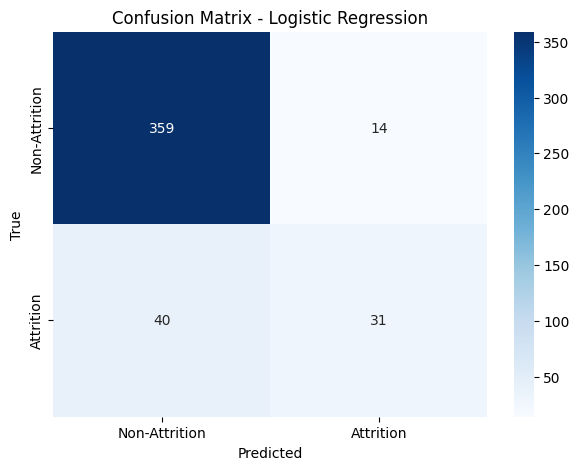

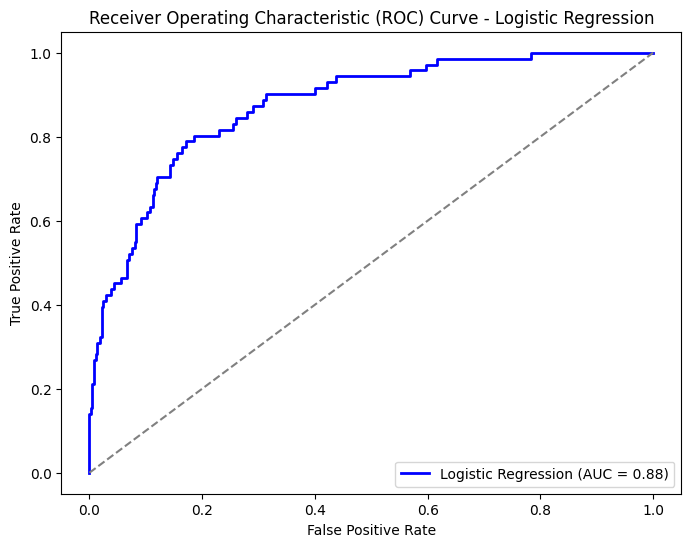

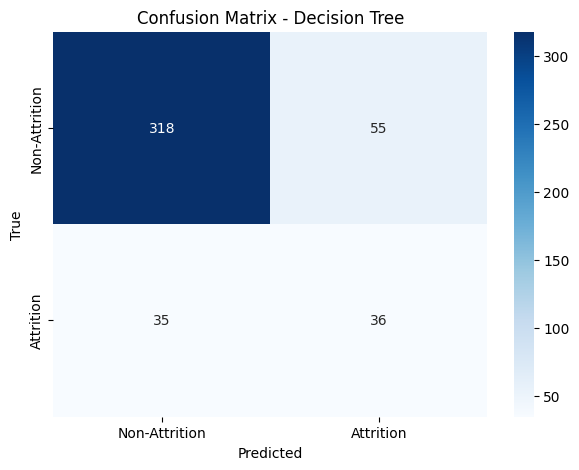

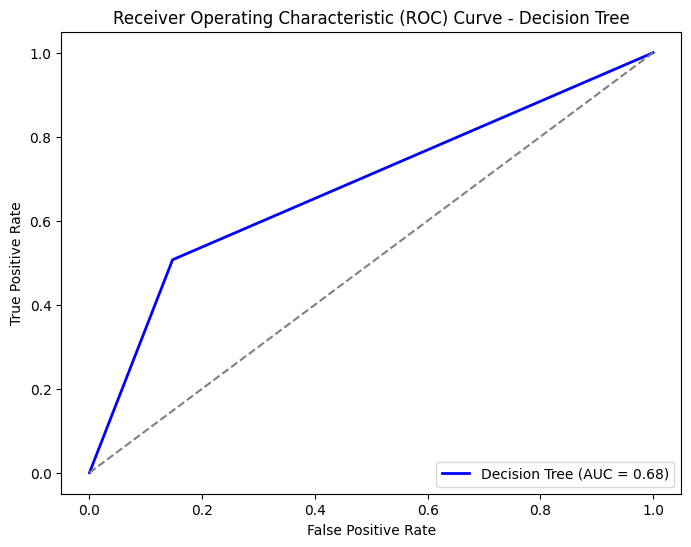

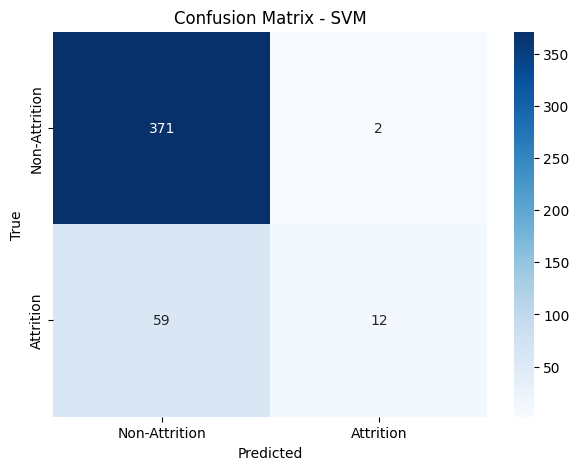

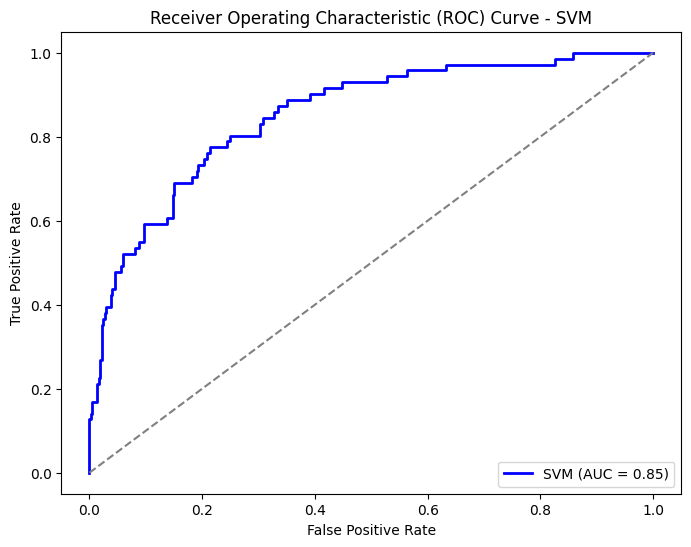

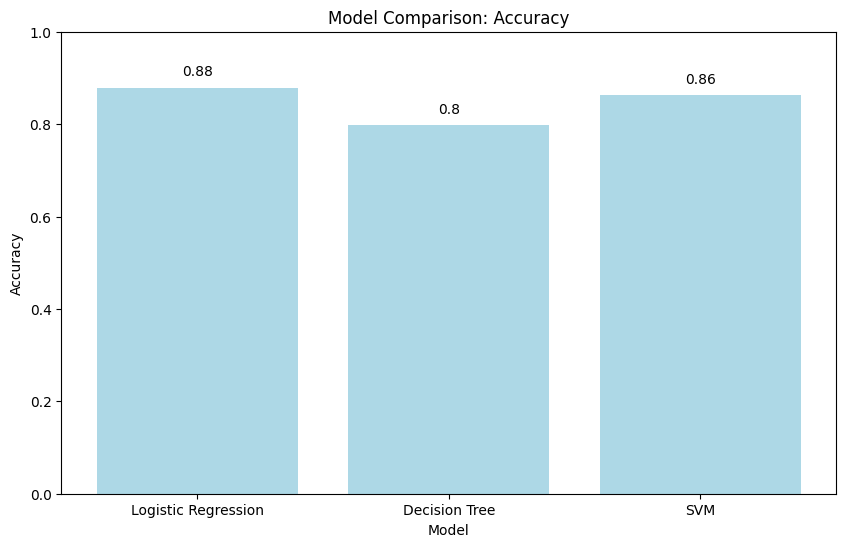

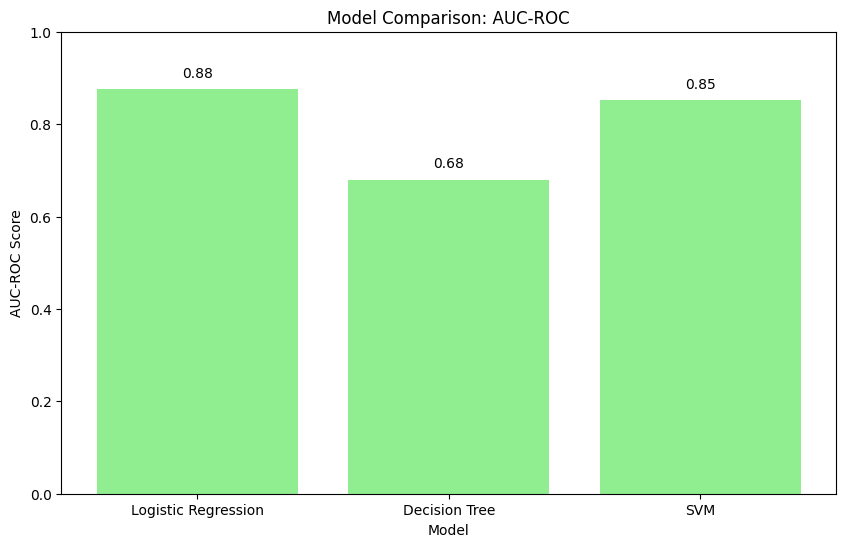

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, auc

# List of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),

}

accuracies = []
roc_auc_scores = []

# Loop over each model to train and evaluate
for name, model in models.items():
    # Train the model with resampled data
    model.fit(X_train_processed, y_train)

    # Predict the test set
    y_pred = model.predict(X_test_processed)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

 # Calculate AUC-ROC score
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_processed)[:, 1]  # Probabilities for the positive class
        # Convert y_test to numerical format before calculating ROC-AUC
        y_test_numeric = y_test.map({'No': 0, 'Yes': 1})  # Mapping 'No' to 0 and 'Yes' to 1

        fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob) # Use y_test_numeric here
        auc_score = auc(fpr, tpr)
        roc_auc_scores.append(auc_score)

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Attrition', 'Attrition'], yticklabels=['Non-Attrition', 'Attrition'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'{name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot Model Accuracy Comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(models.keys(), accuracies, color='lightblue')  # Store the bar objects
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.ylim(0, 1)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.show()

# Plot AUC-ROC Comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(models.keys(), roc_auc_scores, color='lightgreen')  # Store bar objects
plt.xlabel('Model')
plt.ylabel('AUC-ROC Score')
plt.title('Model Comparison: AUC-ROC')
plt.ylim(0, 1)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.show()



**Step 4: Manage Imbalance in the Dataset**

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Define the models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),

}

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

    # Fit the model to the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on the test set
    y_pred = model.predict(X_test_processed)

    # Compute and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Print the classification report
    print(f"Classification Report:\n", classification_report(y_test, y_pred))

    # Print the confusion matrix
    print(f"Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Calculate and print AUC-ROC score if the model supports probability prediction
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_processed)[:, 1]  # Probabilities for the positive class
        auc = roc_auc_score(y_test, y_prob)
        print(f"AUC-ROC: {auc:.2f}")

    print("-" * 50)

Training Logistic Regression...
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

          No       0.96      0.77      0.85       373
         Yes       0.40      0.82      0.54        71

    accuracy                           0.77       444
   macro avg       0.68      0.79      0.69       444
weighted avg       0.87      0.77      0.80       444

Confusion Matrix:
 [[286  87]
 [ 13  58]]
AUC-ROC: 0.87
--------------------------------------------------
Training Decision Tree...
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.86      0.87       373
         Yes       0.34      0.39      0.37        71

    accuracy                           0.78       444
   macro avg       0.61      0.62      0.62       444
weighted avg       0.79      0.78      0.79       444

Confusion Matrix:
 [[319  54]
 [ 43  28]]
AUC-ROC: 0.62
-----------------------------------------------

In [19]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Define the models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
}

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Apply Random Undersampling to the training data
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_processed, y_train)

    # Fit the model to the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on the test set
    y_pred = model.predict(X_test_processed)

    # Compute and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Print the classification report
    print(f"Classification Report:\n", classification_report(y_test, y_pred))

    # Print the confusion matrix
    print(f"Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Calculate and print AUC-ROC score if the model supports probability prediction
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_processed)[:, 1]  # Probabilities for the positive class
        auc = roc_auc_score(y_test, y_prob)
        print(f"AUC-ROC: {auc:.2f}")

    print("-" * 50)

Training Logistic Regression...
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

          No       0.96      0.70      0.81       373
         Yes       0.35      0.85      0.49        71

    accuracy                           0.72       444
   macro avg       0.65      0.77      0.65       444
weighted avg       0.86      0.72      0.76       444

Confusion Matrix:
 [[260 113]
 [ 11  60]]
AUC-ROC: 0.86
--------------------------------------------------
Training Decision Tree...
Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.57      0.69       373
         Yes       0.21      0.61      0.31        71

    accuracy                           0.57       444
   macro avg       0.55      0.59      0.50       444
weighted avg       0.78      0.57      0.63       444

Confusion Matrix:
 [[211 162]
 [ 28  43]]
AUC-ROC: 0.59
-----------------------------------------------

**Step 4: Feature Selection**

In [20]:
# Step 4: Feature Selection

# Define your models for RFE
models_for_rfe = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),  # Use linear kernel for feature importance
}

# Number of features to select
n_features_to_select = 15

# Store selected features for each model
selected_features_by_model = {}

# Get the feature names from the preprocessor
feature_names_all = preprocessor.get_feature_names_out()

# Iterate through models and apply RFE
for model_name, model in models_for_rfe.items():
    selector = RFE(estimator=model, n_features_to_select=n_features_to_select, step=1)
    selector = selector.fit(X_train_processed, y_train)

    # Get selected feature names
    selected_feature_indices = selector.get_support(indices=True)
    # Use feature_names_all to get the actual feature names
    selected_features = [feature_names_all[i] for i in selected_feature_indices]

    # Store selected features for the model
    selected_features_by_model[model_name] = selected_features

# Create a DataFrame for comparison
all_selected_features = pd.DataFrame(selected_features_by_model)
display(all_selected_features)

,Logistic Regression,Decision Tree,SVM
0,cat__BusinessTravel_Non-Travel,num__Age,num__JobSatisfaction
1,cat__BusinessTravel_TravelRarely,num__DailyRate,num__YearsWithCurrManager
2,cat__BusinessTravel_Travel_Frequently,num__DistanceFromHome,cat__BusinessTravel_TravelRarely
3,cat__Department_Research & Development,num__EmployeeNumber,cat__BusinessTravel_Travel_Frequently
4,cat__EducationField_Human Resources,num__EnvironmentSatisfaction,cat__EducationField_Human Resources
5,cat__EducationField_Marketing,num__HourlyRate,cat__EducationField_Marketing
6,cat__EducationField_Technical Degree,num__JobInvolvement,cat__Gender_Female
7,cat__Gender_Female,num__JobLevel,cat__JobRole_Healthcare Representative
8,cat__JobRole_Laboratory Technician,num__MonthlyIncome,cat__JobRole_Laboratory Technician
9,cat__JobRole_Manager,num__MonthlyRate,cat__JobRole_Manufacturing Director


In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define your models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
}

# Number of features to select
n_features_to_select = 15

# Iterate through models, apply RFE, SMOTE, and evaluate
for model_name, model in models.items():
    print(f"Processing {model_name}...")

    # 1. Apply RFE for feature selection
    # For models without coef_ or feature_importances_, use importance_getter='auto' for SVM with a linear kernel
    # If using a non-linear kernel like 'rbf', you need to specify a different importance_getter
    # or use a different feature selection method
    if model_name == 'SVM':
        # Use a linear kernel for feature importance with RFE
        selector = RFE(estimator=SVC(kernel='linear', random_state=42),
                       n_features_to_select=n_features_to_select, step=1)
                       #importance_getter='auto')  # auto works with linear kernel
    else:
        selector = RFE(estimator=model, n_features_to_select=n_features_to_select, step=1)

    X_train_selected = selector.fit_transform(X_train_processed, y_train)
    X_test_selected = selector.transform(X_test_processed)

    # 2. Apply SMOTE to the selected features of the training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

    # 3. Train the model using resampled data and selected features
    model.fit(X_train_resampled, y_train_resampled)

    # 4. Predict and evaluate using selected features
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # 5. Print classification report and confusion matrix
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)  # Separator between models

    # Calculate and print ROC AUC score
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC Score: {roc_auc:.2f}")
        print("-" * 50)  # Separator between models

    # (Optional: Get and display selected feature names)
    selected_feature_indices = selector.get_support(indices=True)
    feature_names_all = preprocessor.get_feature_names_out() # Assuming 'preprocessor' is your ColumnTransformer
    selected_feature_names = [feature_names_all[i] for i in selected_feature_indices]
    print(f"Selected Features for {model_name}: {selected_feature_names}")
    print("-" * 50)  # Separator between models

Processing Logistic Regression...
Accuracy: 0.72
              precision    recall  f1-score   support

          No       0.94      0.72      0.81       373
         Yes       0.33      0.75      0.46        71

    accuracy                           0.72       444
   macro avg       0.64      0.73      0.64       444
weighted avg       0.84      0.72      0.76       444

[[267 106]
 [ 18  53]]
--------------------------------------------------
ROC AUC Score: 0.80
--------------------------------------------------
Selected Features for Logistic Regression: ['cat__BusinessTravel_Non-Travel', 'cat__BusinessTravel_TravelRarely', 'cat__BusinessTravel_Travel_Frequently', 'cat__Department_Research & Development', 'cat__EducationField_Human Resources', 'cat__EducationField_Marketing', 'cat__EducationField_Technical Degree', 'cat__Gender_Female', 'cat__JobRole_Laboratory Technician', 'cat__JobRole_Manager', 'cat__JobRole_Research Director', 'cat__MaritalStatus_Single', 'cat__OverTime_No', 'ca

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define your models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
}

# Number of features to select
n_features_to_select = 15  # You can adjust this

# Iterate through models, apply RFE, Random Oversampling, and evaluate
for model_name, model in models.items():
    print(f"Processing {model_name}...")

    # 1. Apply RFE for feature selection
    # Use linear kernel for SVM to get feature importance with RFE
    if model_name == 'SVM':
        selector = RFE(estimator=SVC(kernel='linear', random_state=42),
                       n_features_to_select=n_features_to_select, step=1)
    else:
        selector = RFE(estimator=model, n_features_to_select=n_features_to_select, step=1)

    X_train_selected = selector.fit_transform(X_train_processed, y_train)
    X_test_selected = selector.transform(X_test_processed)

    # 2. Apply Random Oversampling to the selected features of the training data
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_selected, y_train)

    # 3. Train the model using resampled data and selected features
    model.fit(X_train_resampled, y_train_resampled)

    # 4. Predict and evaluate using selected features
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # 5. Print classification report and confusion matrix
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)  # Separator between models

    # Calculate and print ROC AUC score
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC Score: {roc_auc:.2f}")
        print("-" * 50)

    # (Optional: Get and display selected feature names)
    selected_feature_indices = selector.get_support(indices=True)
    feature_names_all = preprocessor.get_feature_names_out()
    selected_feature_names = [feature_names_all[i] for i in selected_feature_indices]
    print(f"Selected Features for {model_name}: {selected_feature_names}")
    print("-" * 50)  # Separator between models

Processing Logistic Regression...
Accuracy: 0.72
              precision    recall  f1-score   support

          No       0.95      0.71      0.81       373
         Yes       0.34      0.80      0.48        71

    accuracy                           0.72       444
   macro avg       0.65      0.75      0.64       444
weighted avg       0.85      0.72      0.76       444

[[263 110]
 [ 14  57]]
--------------------------------------------------
ROC AUC Score: 0.81
--------------------------------------------------
Selected Features for Logistic Regression: ['cat__BusinessTravel_Non-Travel', 'cat__BusinessTravel_TravelRarely', 'cat__BusinessTravel_Travel_Frequently', 'cat__Department_Research & Development', 'cat__EducationField_Human Resources', 'cat__EducationField_Marketing', 'cat__EducationField_Technical Degree', 'cat__Gender_Female', 'cat__JobRole_Laboratory Technician', 'cat__JobRole_Manager', 'cat__JobRole_Research Director', 'cat__MaritalStatus_Single', 'cat__OverTime_No', 'ca

**Step 5: Hyperparameter Tuning**

In [32]:
#Define models and parameter grids
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
}

param_grids = {
    'Logistic Regression': {
        'rfe__n_features_to_select': [5, 10, 15, 20],
        'model__C': [0.01, 0.1, 1, 10],
        'model__solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'rfe__n_features_to_select': [5, 10, 15, 20],
        'model__max_depth': [3, 5, 10, 20],
        'model__min_samples_split': [2, 5, 10],
        'model__criterion': ['gini', 'entropy']
    },
    'SVM': {
        'rfe__n_features_to_select': [5, 10, 15, 20],
        'model__C': [0.1, 1, 10, 100],
        'model__kernel': ['linear'],  # Only use 'linear' kernel for RFE with SVM
        'model__gamma': ['scale', 'auto']
    }
}

# Create a dictionary to store the best models
best_models = {}

# Iterate through models, apply RFE, SMOTE, and evaluate
for model_name, model in models.items():
    print(f"Processing {model_name}...")

    # Create a pipeline
    pipeline = Pipeline([
        ('rfe', RFE(estimator=model if model_name != 'SVM' else SVC(kernel='linear', random_state=42))), # Use linear kernel for RFE with SVM
        ('model', model)
    ])

    # Hyperparameter tuning with RandomizedSearchCV
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_grids[model_name],
                                      cv=5, n_jobs=-1, scoring='accuracy', n_iter=10)

    # Apply SMOTE before fitting the pipeline
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

    random_search.fit(X_train_resampled, y_train_resampled) #Fit to resampled data

    # Get the best model and evaluate
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Print classification report and confusion matrix
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

    # Print best hyperparameters
    print(f"Best Hyperparameters for {model_name}: {random_search.best_params_}")
    print("-" * 50)

    # Calculate and print ROC AUC score
    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(X_test_processed)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC Score: {roc_auc:.2f}")
        print("-" * 50)

    # Store the best model in the dictionary # This line was missing
    best_models[model_name] = best_model

Processing Logistic Regression...
Accuracy: 0.72
              precision    recall  f1-score   support

          No       0.92      0.72      0.81       373
         Yes       0.32      0.69      0.44        71

    accuracy                           0.72       444
   macro avg       0.62      0.71      0.63       444
weighted avg       0.83      0.72      0.75       444

[[270 103]
 [ 22  49]]
--------------------------------------------------
Best Hyperparameters for Logistic Regression: {'rfe__n_features_to_select': 15, 'model__solver': 'saga', 'model__C': 10}
--------------------------------------------------
ROC AUC Score: 0.79
--------------------------------------------------
Processing Decision Tree...
Accuracy: 0.75
              precision    recall  f1-score   support

          No       0.87      0.83      0.85       373
         Yes       0.26      0.32      0.29        71

    accuracy                           0.75       444
   macro avg       0.56      0.58      0.57   

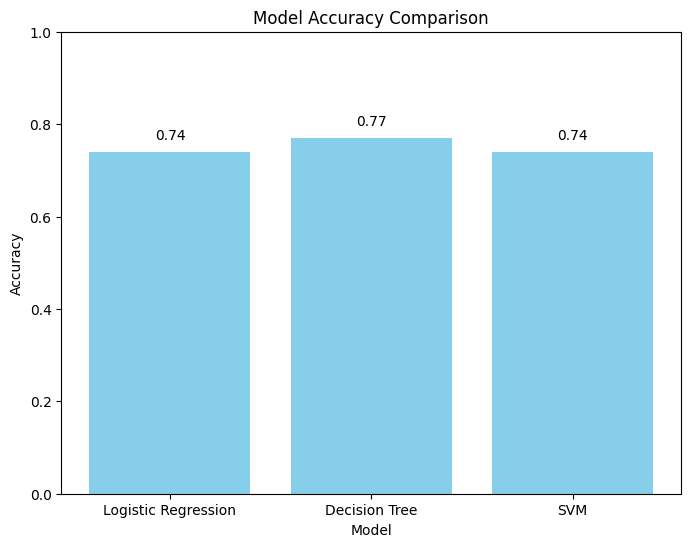

In [24]:
# Accuracy values for each model
accuracies = {
    'Logistic Regression': 0.74,
    'Decision Tree': 0.76,
    'SVM': 0.74,
}

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)

# Add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.show()


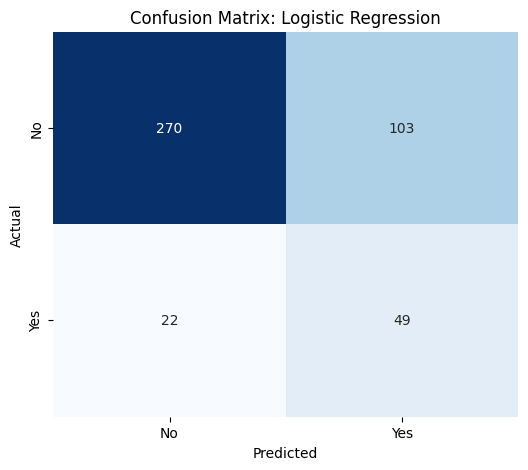

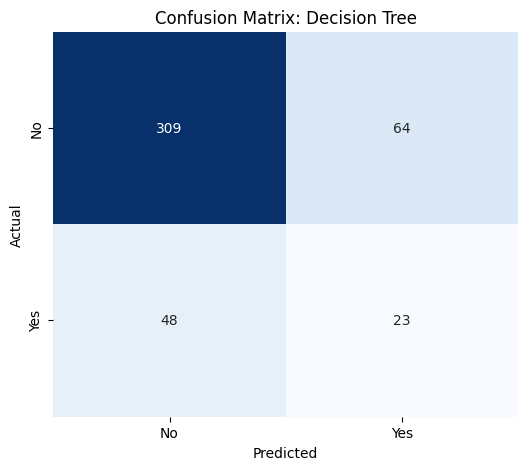

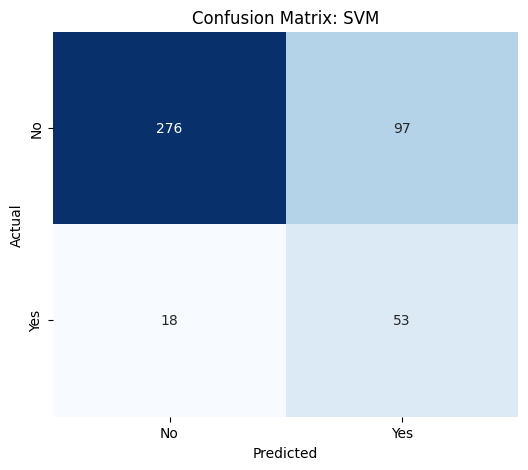

In [33]:
# Model names
models = ['Logistic Regression', 'Decision Tree', 'SVM']
y_true = y_test  # True labels

# Assuming 'best_models' from your GridSearchCV cell contains the trained models
y_preds = {
    'Logistic Regression': best_models['Logistic Regression'].predict(X_test_processed),
    'Decision Tree': best_models['Decision Tree'].predict(X_test_processed),
    'SVM': best_models['SVM'].predict(X_test_processed),
}

# Plot confusion matrix for each model
for model in models:
    cm = confusion_matrix(y_true, y_preds[model])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.title(f'Confusion Matrix: {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Step 6: Comparison between all models

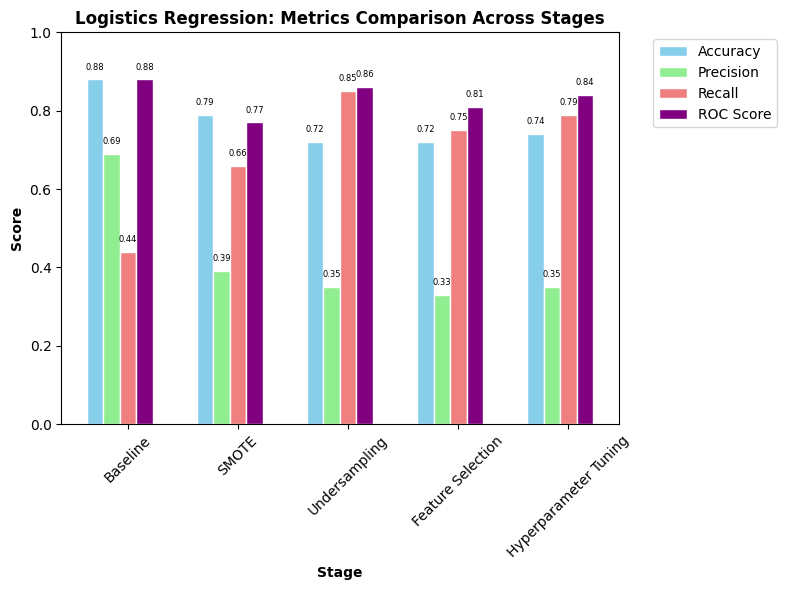

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Model name
model_name = 'Logistics Regression'

# Define the stages and their corresponding metrics
stages = ['Baseline', 'SMOTE', 'Undersampling', 'Feature Selection', 'Hyperparameter Tuning',]

# Assuming you have the metric values for each stage (replace with your actual values):
accuracy_scores = [0.88, 0.79, 0.72, 0.72, 0.74]
precision_scores = [0.69, 0.39, 0.35, 0.33, 0.35]
recall_scores = [0.44, 0.66, 0.85, 0.75, 0.79]
roc_scores = [0.88, 0.77, 0.86, 0.81, 0.84]

# Create a list of metrics and their corresponding scores
metrics = ['Accuracy', 'Precision', 'Recall', 'ROC Score']
scores_by_stage = [accuracy_scores, precision_scores, recall_scores, roc_scores]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r = np.arange(len(stages))
r1 = r
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]


# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(r1, accuracy_scores, color='skyblue', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision_scores, color='lightgreen', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall_scores, color='lightcoral', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, roc_scores, color='purple', width=bar_width, edgecolor='white', label='ROC Score')


# Add labels, title, and legend
plt.xlabel('Stage', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.title(f'{model_name}: Metrics Comparison Across Stages', fontweight='bold')  # Title updated
plt.xticks([r + bar_width * 2 for r in range(len(stages))], stages, rotation=45, ha='center')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add data labels on top of bars (optional)
for i, v in enumerate(accuracy_scores):
    plt.text(r1[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=6)
for i, v in enumerate(precision_scores):
    plt.text(r2[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=6)
for i, v in enumerate(recall_scores):
    plt.text(r3[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=6)
for i, v in enumerate(roc_scores):
    plt.text(r4[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=6)

# Show the plot
plt.tight_layout()
plt.show()

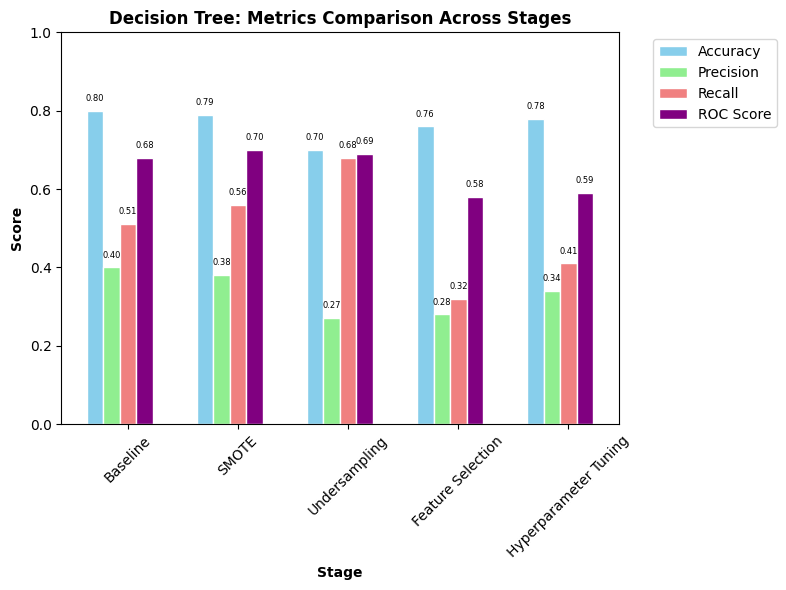

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Model name
model_name = 'Decision Tree'

# Define the stages and their corresponding metrics
stages = ['Baseline', 'SMOTE', 'Undersampling', 'Feature Selection', 'Hyperparameter Tuning',]

# Assuming you have the metric values for each stage (replace with your actual values):
accuracy_scores = [0.80, 0.79, 0.70, 0.76, 0.78]
precision_scores = [0.40, 0.38, 0.27, 0.28, 0.34]
recall_scores = [0.51, 0.56, 0.68, 0.32, 0.41]
roc_scores = [0.68, 0.70, 0.69, 0.58, 0.59]

# Create a list of metrics and their corresponding scores
metrics = ['Accuracy', 'Precision', 'Recall', 'ROC Score']
scores_by_stage = [accuracy_scores, precision_scores, recall_scores, roc_scores]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r = np.arange(len(stages))
r1 = r
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]


# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(r1, accuracy_scores, color='skyblue', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision_scores, color='lightgreen', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall_scores, color='lightcoral', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, roc_scores, color='purple', width=bar_width, edgecolor='white', label='ROC Score')


# Add labels, title, and legend
plt.xlabel('Stage', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.title(f'{model_name}: Metrics Comparison Across Stages', fontweight='bold')  # Title updated
plt.xticks([r + bar_width * 2 for r in range(len(stages))], stages, rotation=45, ha='center')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add data labels on top of bars (optional)
for i, v in enumerate(accuracy_scores):
    plt.text(r1[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=6)
for i, v in enumerate(precision_scores):
    plt.text(r2[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=6)
for i, v in enumerate(recall_scores):
    plt.text(r3[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=6)
for i, v in enumerate(roc_scores):
    plt.text(r4[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=6)

# Show the plot
plt.tight_layout()
plt.show()

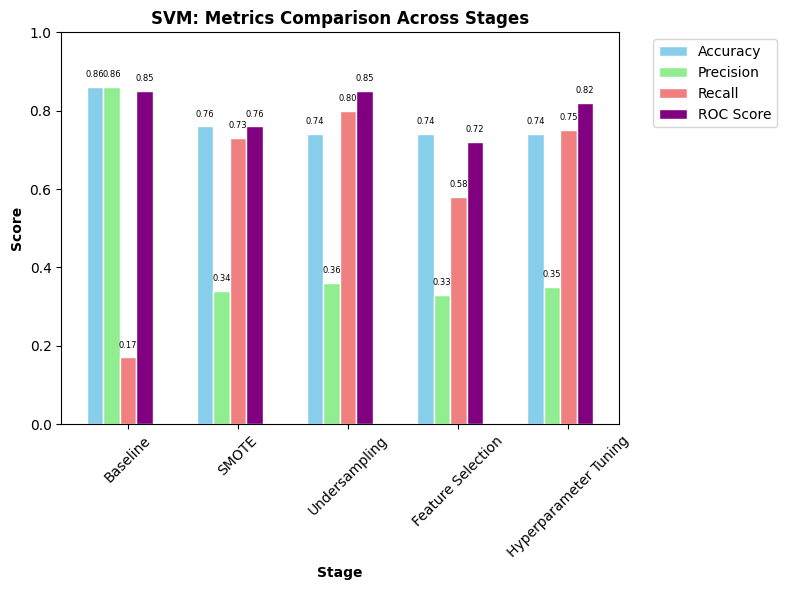

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Model name
model_name = 'SVM'

# Define the stages and their corresponding metrics
stages = ['Baseline', 'SMOTE', 'Undersampling', 'Feature Selection', 'Hyperparameter Tuning',]

# Assuming you have the metric values for each stage (replace with your actual values):
accuracy_scores = [0.86, 0.76, 0.74, 0.74, 0.74]
precision_scores = [0.86, 0.34, 0.36, 0.33, 0.35]
recall_scores = [0.17, 0.73, 0.80, 0.58, 0.75]
roc_scores = [0.85, 0.76, 0.85, 0.72, 0.82]

# Create a list of metrics and their corresponding scores
metrics = ['Accuracy', 'Precision', 'Recall', 'ROC Score']
scores_by_stage = [accuracy_scores, precision_scores, recall_scores, roc_scores]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r = np.arange(len(stages))
r1 = r
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]


# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(r1, accuracy_scores, color='skyblue', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision_scores, color='lightgreen', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall_scores, color='lightcoral', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, roc_scores, color='purple', width=bar_width, edgecolor='white', label='ROC Score')


# Add labels, title, and legend
plt.xlabel('Stage', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.title(f'{model_name}: Metrics Comparison Across Stages', fontweight='bold')  # Title updated
plt.xticks([r + bar_width * 2 for r in range(len(stages))], stages, rotation=45, ha='center')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add data labels on top of bars (optional)
for i, v in enumerate(accuracy_scores):
    plt.text(r1[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=6)
for i, v in enumerate(precision_scores):
    plt.text(r2[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=6)
for i, v in enumerate(recall_scores):
    plt.text(r3[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=6)
for i, v in enumerate(roc_scores):
    plt.text(r4[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=6)

# Show the plot
plt.tight_layout()
plt.show()